In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import keras
import missingno as msno
import warnings
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=1.5)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# ***1. Open Data***

In [2]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# ***2. Data Analysis***

<Axes: >

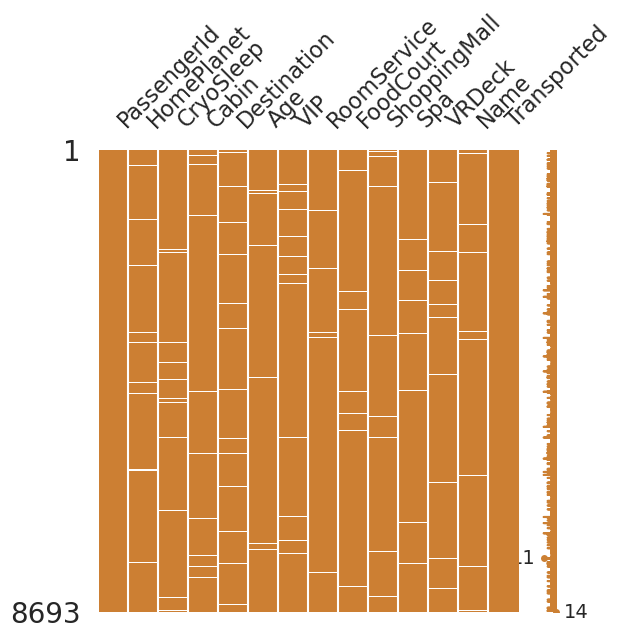

In [5]:
# Check Missing Datas
msno.matrix(df_train, figsize=(6, 6), color=(0.8, 0.5, 0.2))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


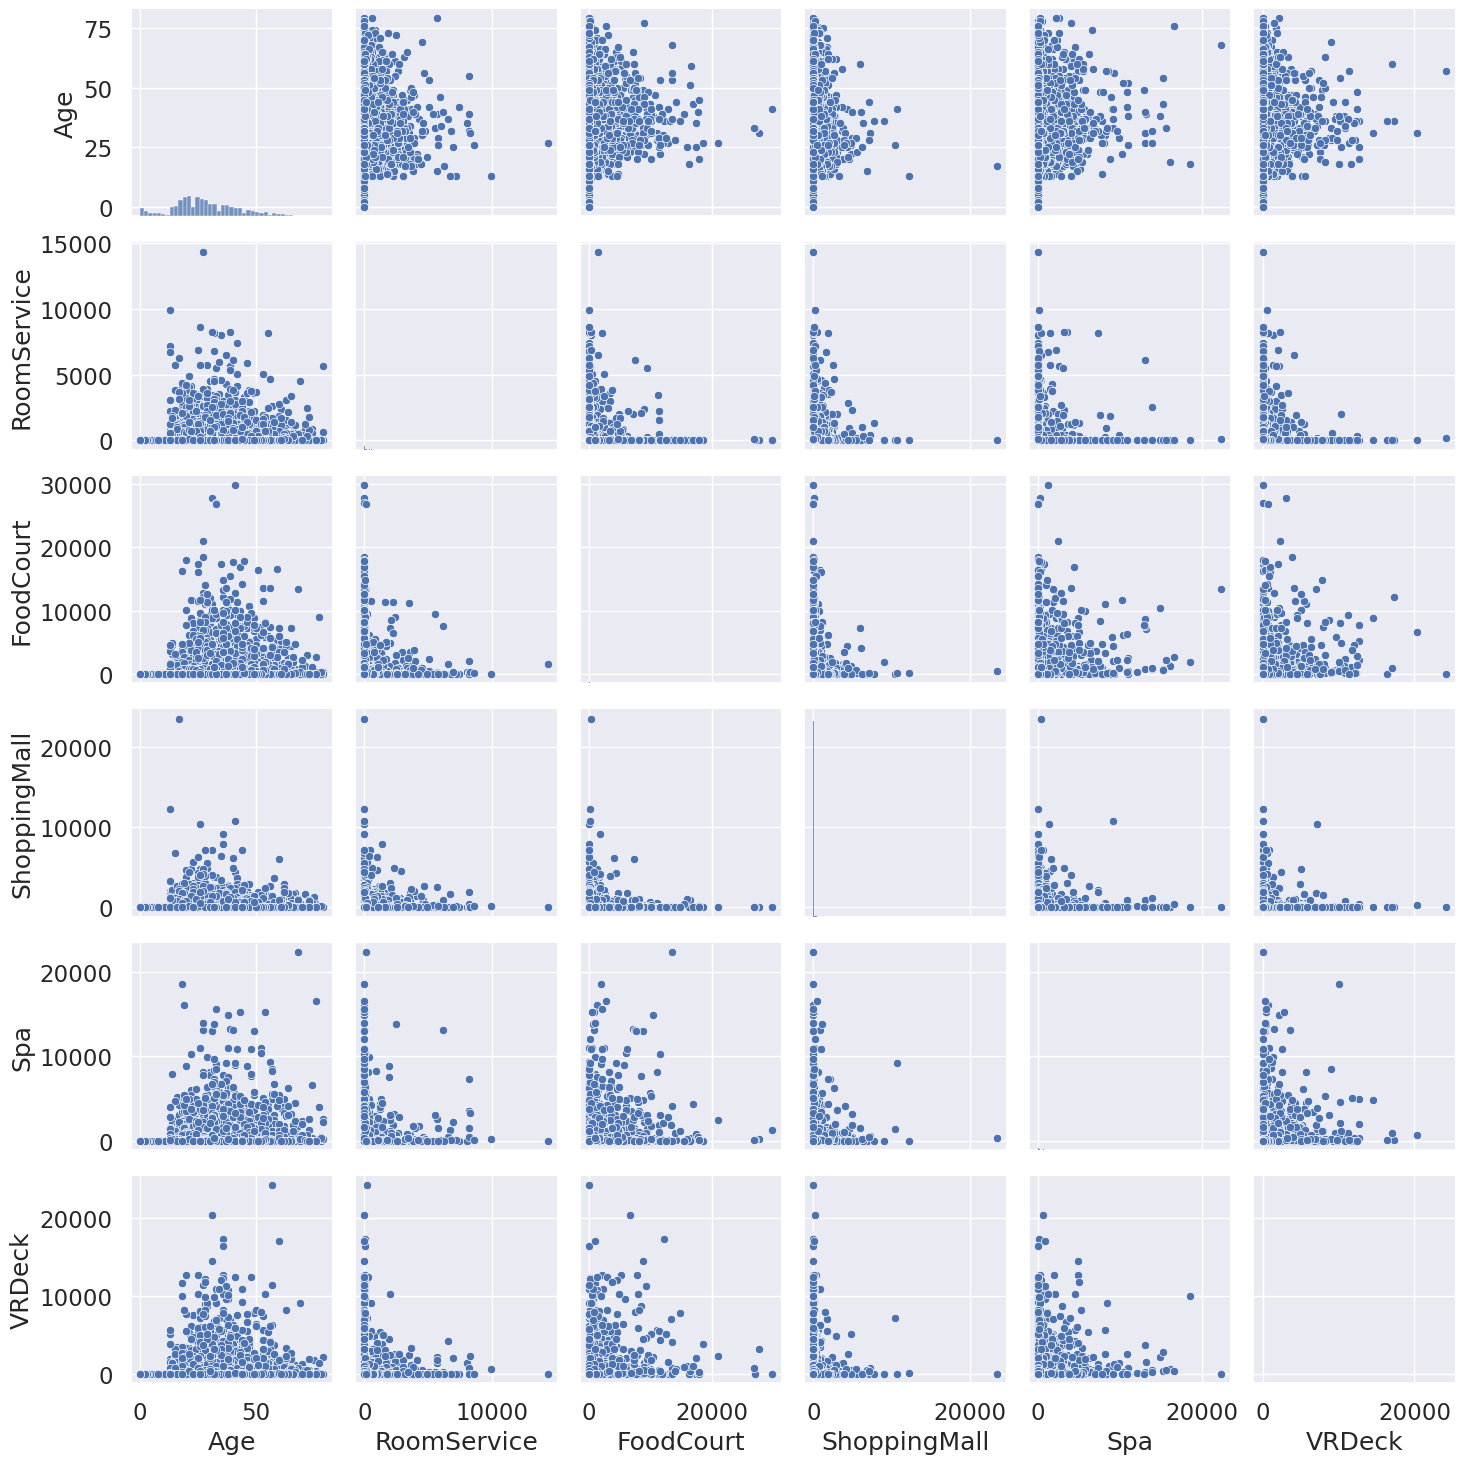

In [7]:
sns.pairplot(df_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
plt.show()

In [8]:
print(df_train.Transported.head())
df_train.Transported.describe()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool


count     8693
unique       2
top       True
freq      4378
Name: Transported, dtype: object

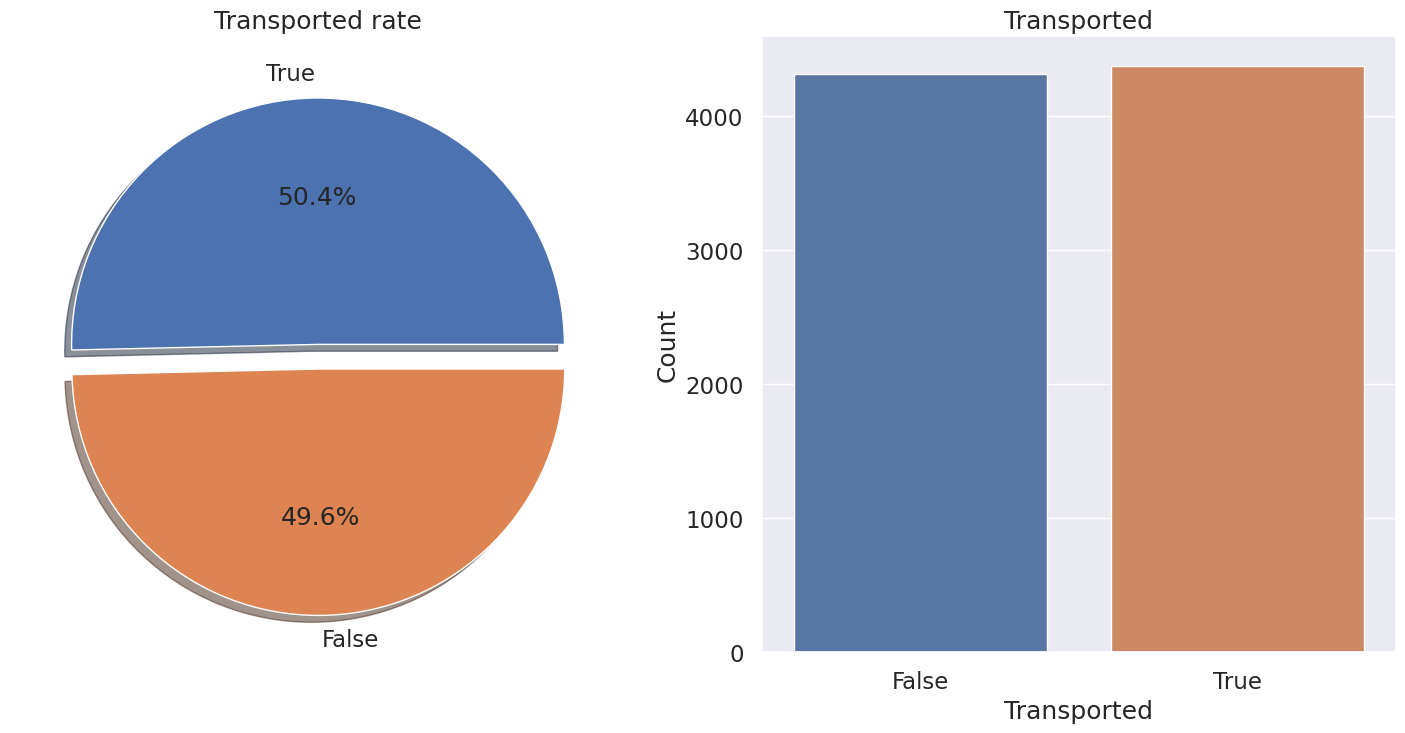

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Transported'].value_counts().plot.pie(explode=[0, 0.1], ax=ax[0], autopct="%1.1f%%", shadow=True)
ax[0].set_title('Transported rate')
ax[0].set_ylabel('')

sns.countplot(data=df_train, x='Transported', ax=ax[1])
ax[1].set_title('Transported')
ax[1].set_ylabel('Count')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

-> Almost Same Ratio of both.

### ***1. PassengerId***

In [10]:
df_train.PassengerId.unique()

array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object)

### ***2. HomePlanet***

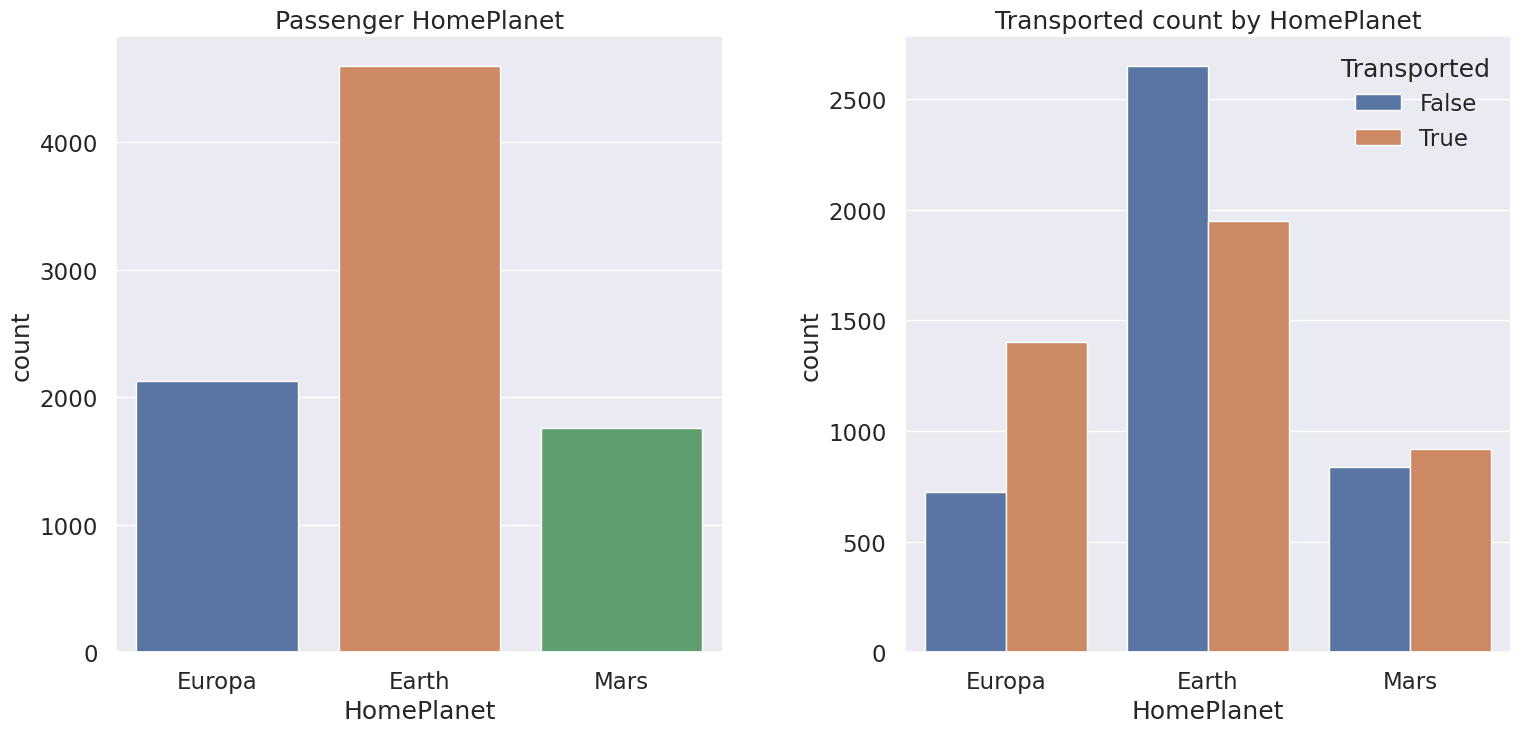

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=df_train, x='HomePlanet', ax=ax[0])
ax[0].set_title("Passenger HomePlanet")

sns.countplot(data=df_train, x='HomePlanet', hue='Transported', ax=ax[1])
ax[1].set_title("Transported count by HomePlanet")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

-> Most Passengers came from Earth, while Transported Rate of passengers came from Europa was the highest.

### ***3. CryoSleep***

In [12]:
df_train.CryoSleep.describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

<Axes: xlabel='CryoSleep', ylabel='count'>

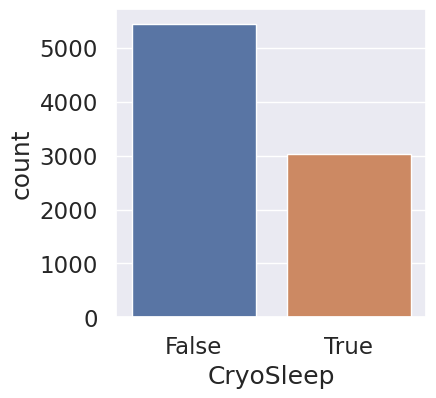

In [13]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df_train, x='CryoSleep')

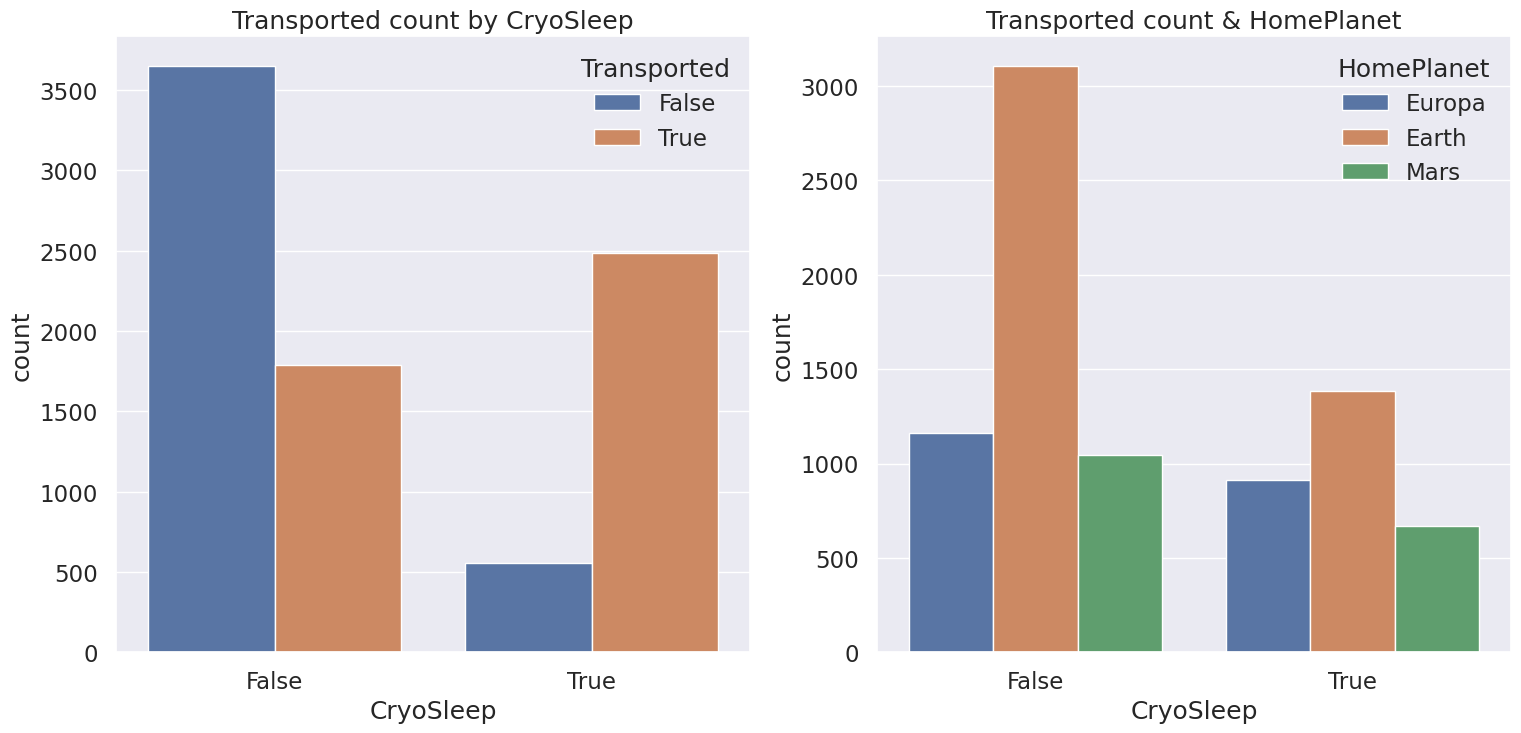

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=df_train, x='CryoSleep', hue='Transported', ax=ax[0])
ax[0].set_title('Transported count by CryoSleep')

sns.countplot(data=df_train, x='CryoSleep', hue='HomePlanet', ax=ax[1])
ax[1].set_title('Transported count & HomePlanet')

plt.show()

-> Higher Transported Rate if CryoSleep == True.

### ***4. Cabin***

In [15]:
df_train.Cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

### ***5. Destination***

<Axes: xlabel='Destination', ylabel='count'>

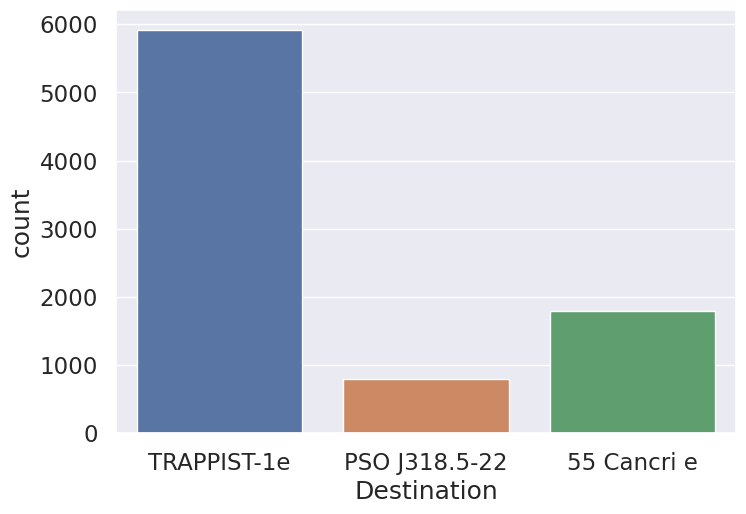

In [16]:
sns.countplot(data=df_train, x='Destination')

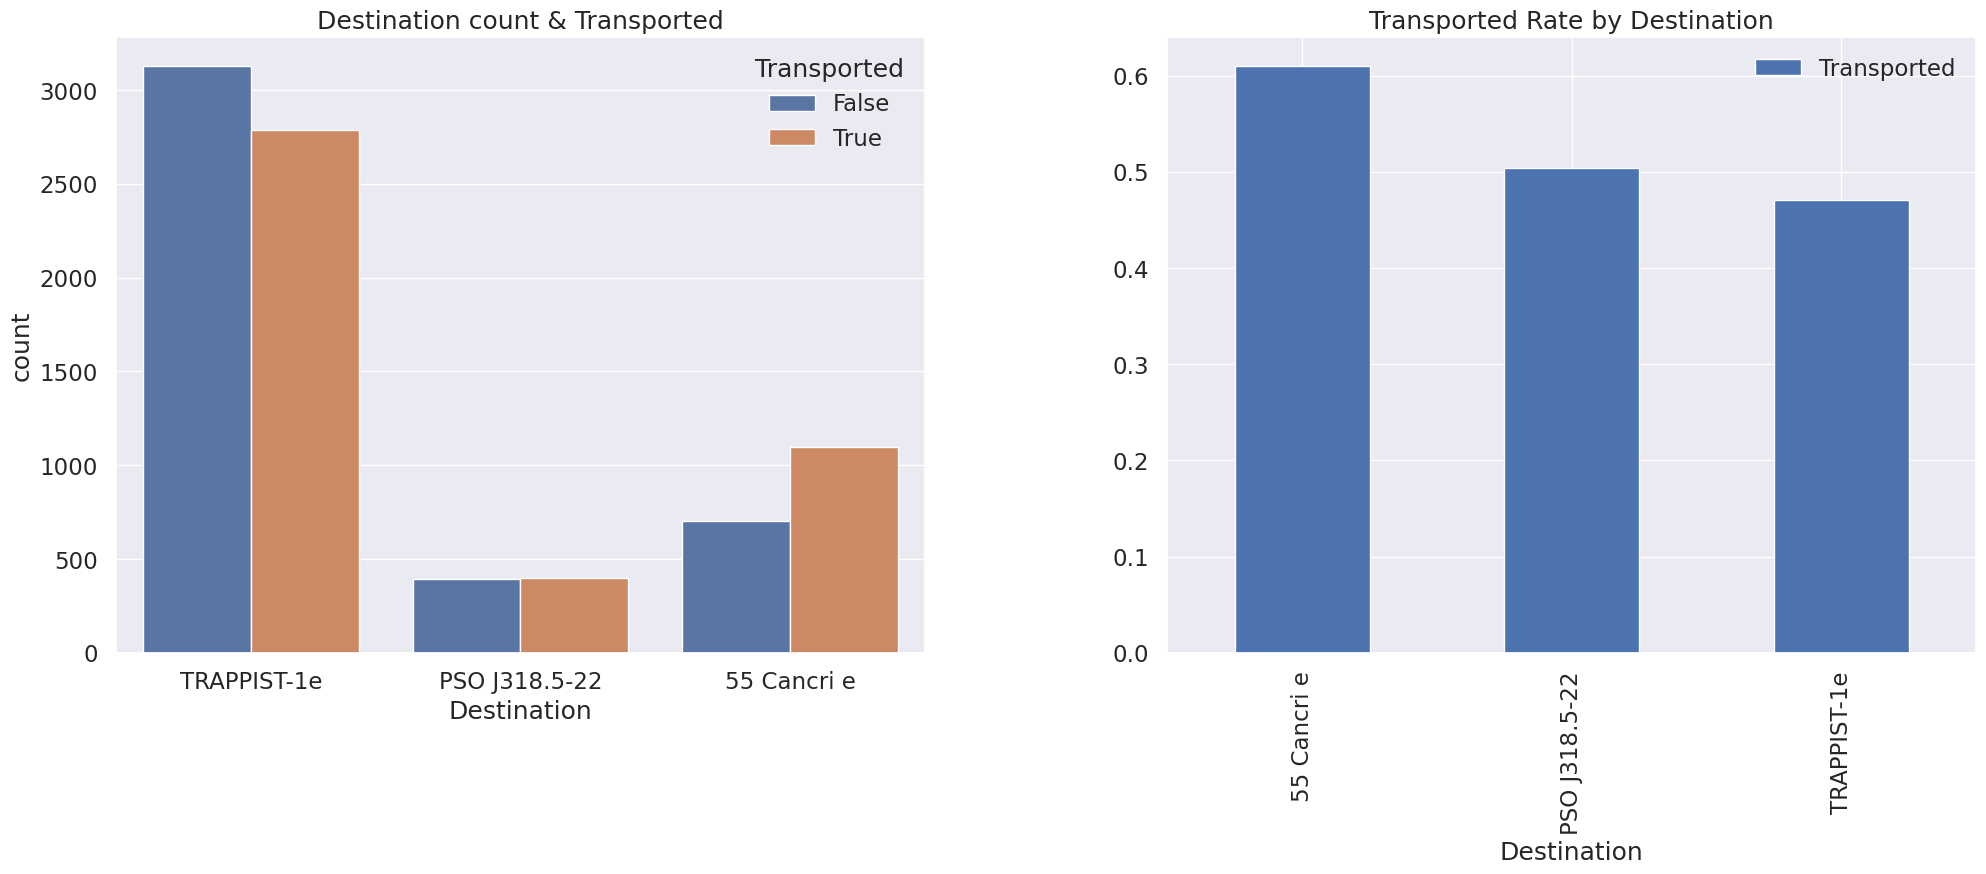

In [17]:
f, ax = plt.subplots(1, 2, figsize=(24, 8))

sns.countplot(data=df_train, x='Destination', hue='Transported', ax=ax[0])
ax[0].set_title("Destination count & Transported")

df_train[['Destination', 'Transported']].groupby('Destination', as_index=True).mean().sort_values(by='Transported', ascending=False).plot.bar(ax=ax[1])
ax[1].set_title("Transported Rate by Destination")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

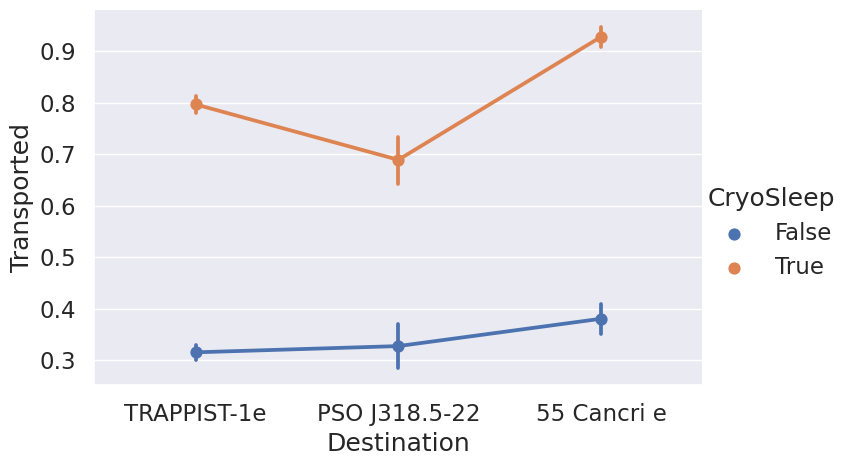

In [18]:
sns.catplot(data=df_train, x='Destination', y='Transported', hue='CryoSleep', aspect=1.5, kind='point')

In [19]:
pd.crosstab(df_train['HomePlanet'], df_train['Destination'], margins=True).style.background_gradient(cmap='summer_r')

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,All
HomePlanet,,,,
Earth,690,712,3101,4503
Europa,886,19,1189,2094
Mars,193,49,1475,1717
All,1769,780,5765,8314


In [20]:
pd.crosstab(df_train[df_train['Transported'] == True]['HomePlanet'], df_train[df_train['Transported'] == True]['Destination'], margins=True).style.background_gradient(cmap='summer_r')

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,All
HomePlanet,,,,
Earth,348,355,1207,1910
Europa,611,14,755,1380
Mars,118,22,755,895
All,1077,391,2717,4185


In [21]:
pd.crosstab(df_train[df_train['Transported'] == False]['HomePlanet'], df_train[df_train['Transported'] == False]['Destination'], margins=True).style.background_gradient(cmap='summer_r')

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,All
HomePlanet,,,,
Earth,342,357,1894,2593
Europa,275,5,434,714
Mars,75,27,720,822
All,692,389,3048,4129


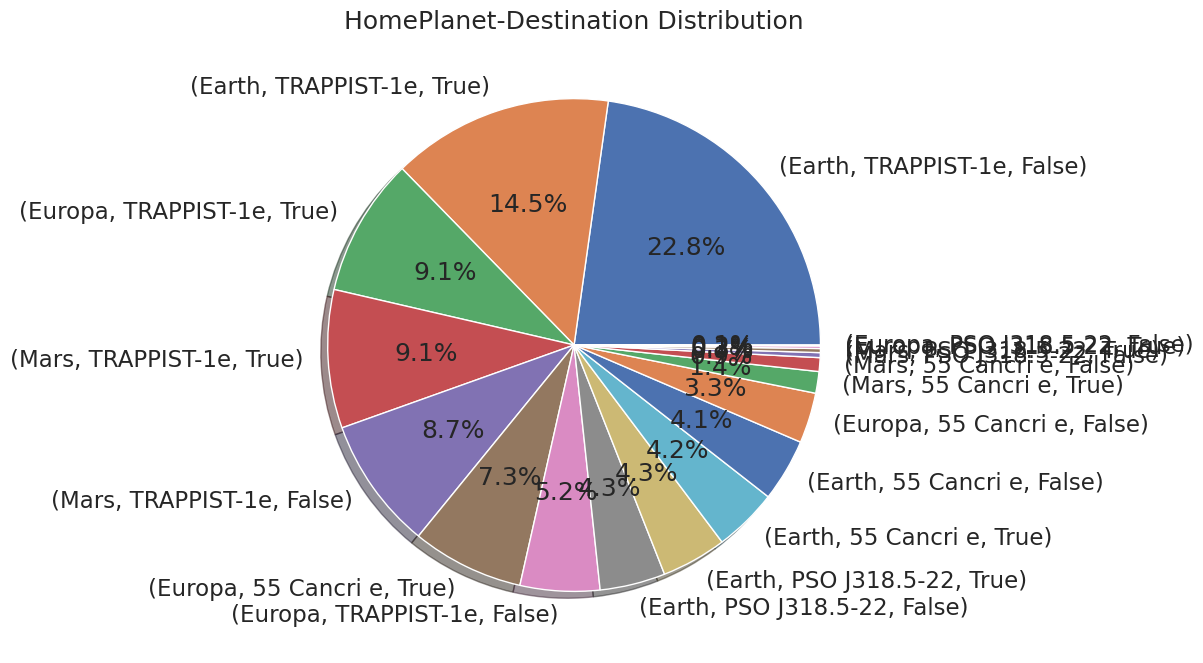

In [22]:
plt.figure(figsize=(8, 8))
df_train[['HomePlanet', 'Destination', 'Transported']].groupby(["HomePlanet", 'Destination'], as_index=True).value_counts().sort_values(ascending=False).plot.pie(autopct="%1.1f%%", shadow=True)
plt.title("HomePlanet-Destination Distribution")

plt.show()

### ***6. Age***

In [23]:
print(df_train.Age.isnull().value_counts())
df_train.Age.describe()

False    8514
True      179
Name: Age, dtype: int64


count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

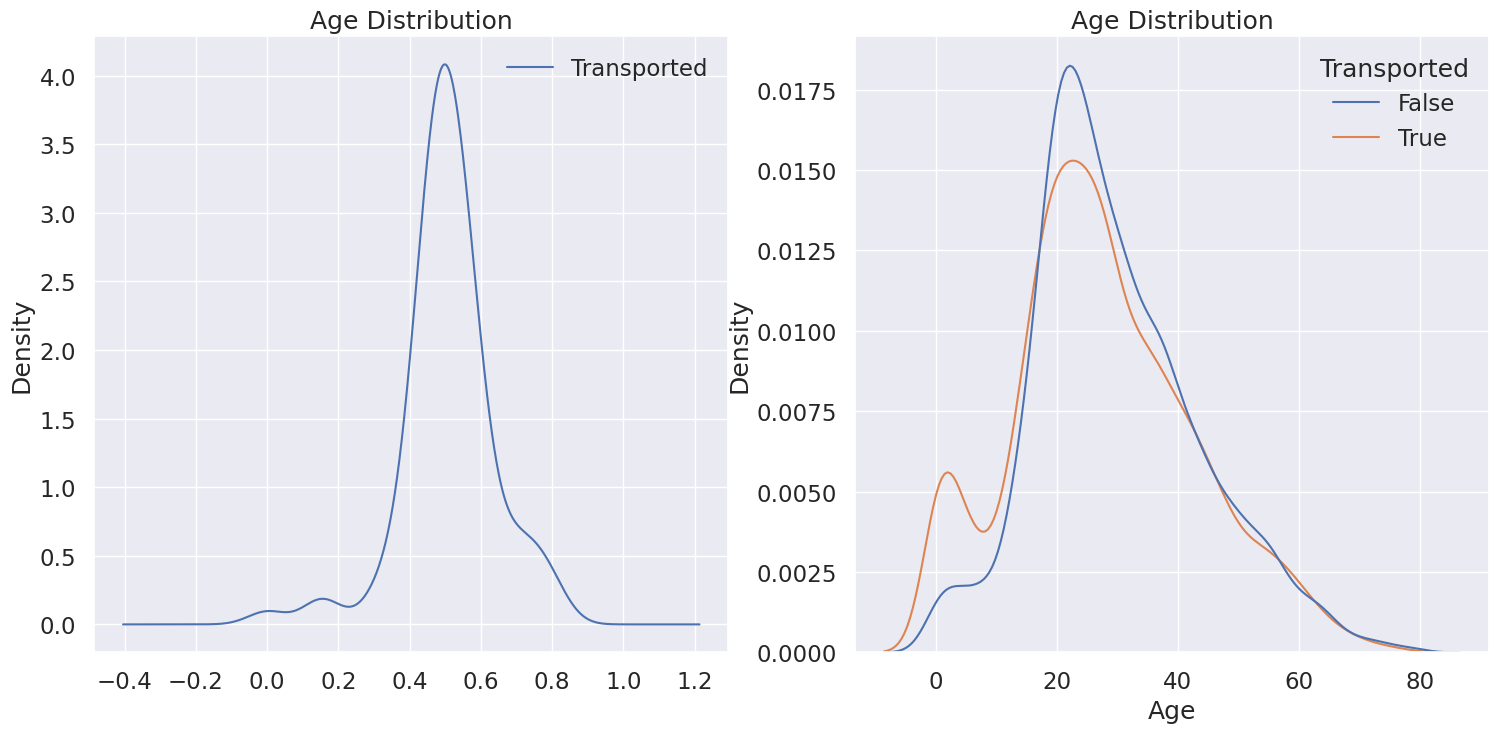

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Age', 'Transported']].groupby('Age', as_index=True).mean().plot.kde(ax=ax[0])
ax[0].set_title("Age Distribution")

sns.kdeplot(data=df_train, x='Age', hue='Transported', ax=ax[1])
ax[1].set_title("Age Distribution")

plt.show()

-> The younger, the higher Transport Rate.

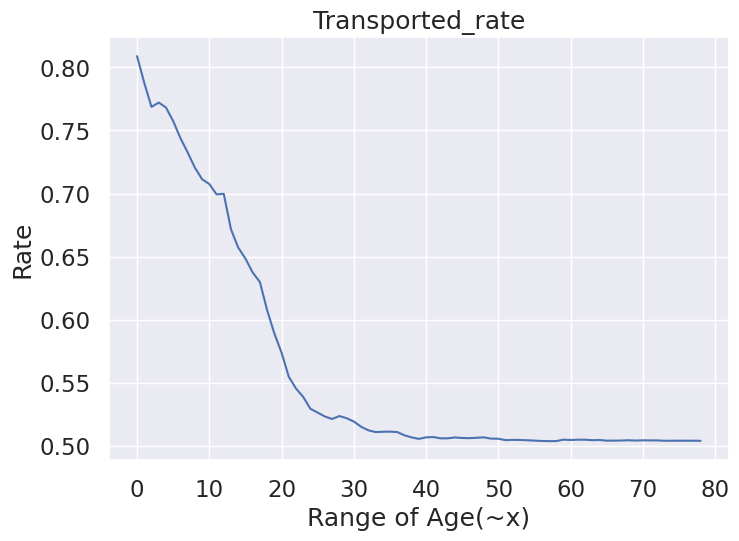

In [25]:
Transported_rate = [df_train[df_train['Age'] < i]['Transported'].sum() / len(df_train[df_train['Age'] < i]['Transported']) for i in range(1, 80)]

plt.plot(Transported_rate)
plt.title("Transported_rate")
plt.xlabel("Range of Age(~x)")
plt.ylabel("Rate")

plt.show()

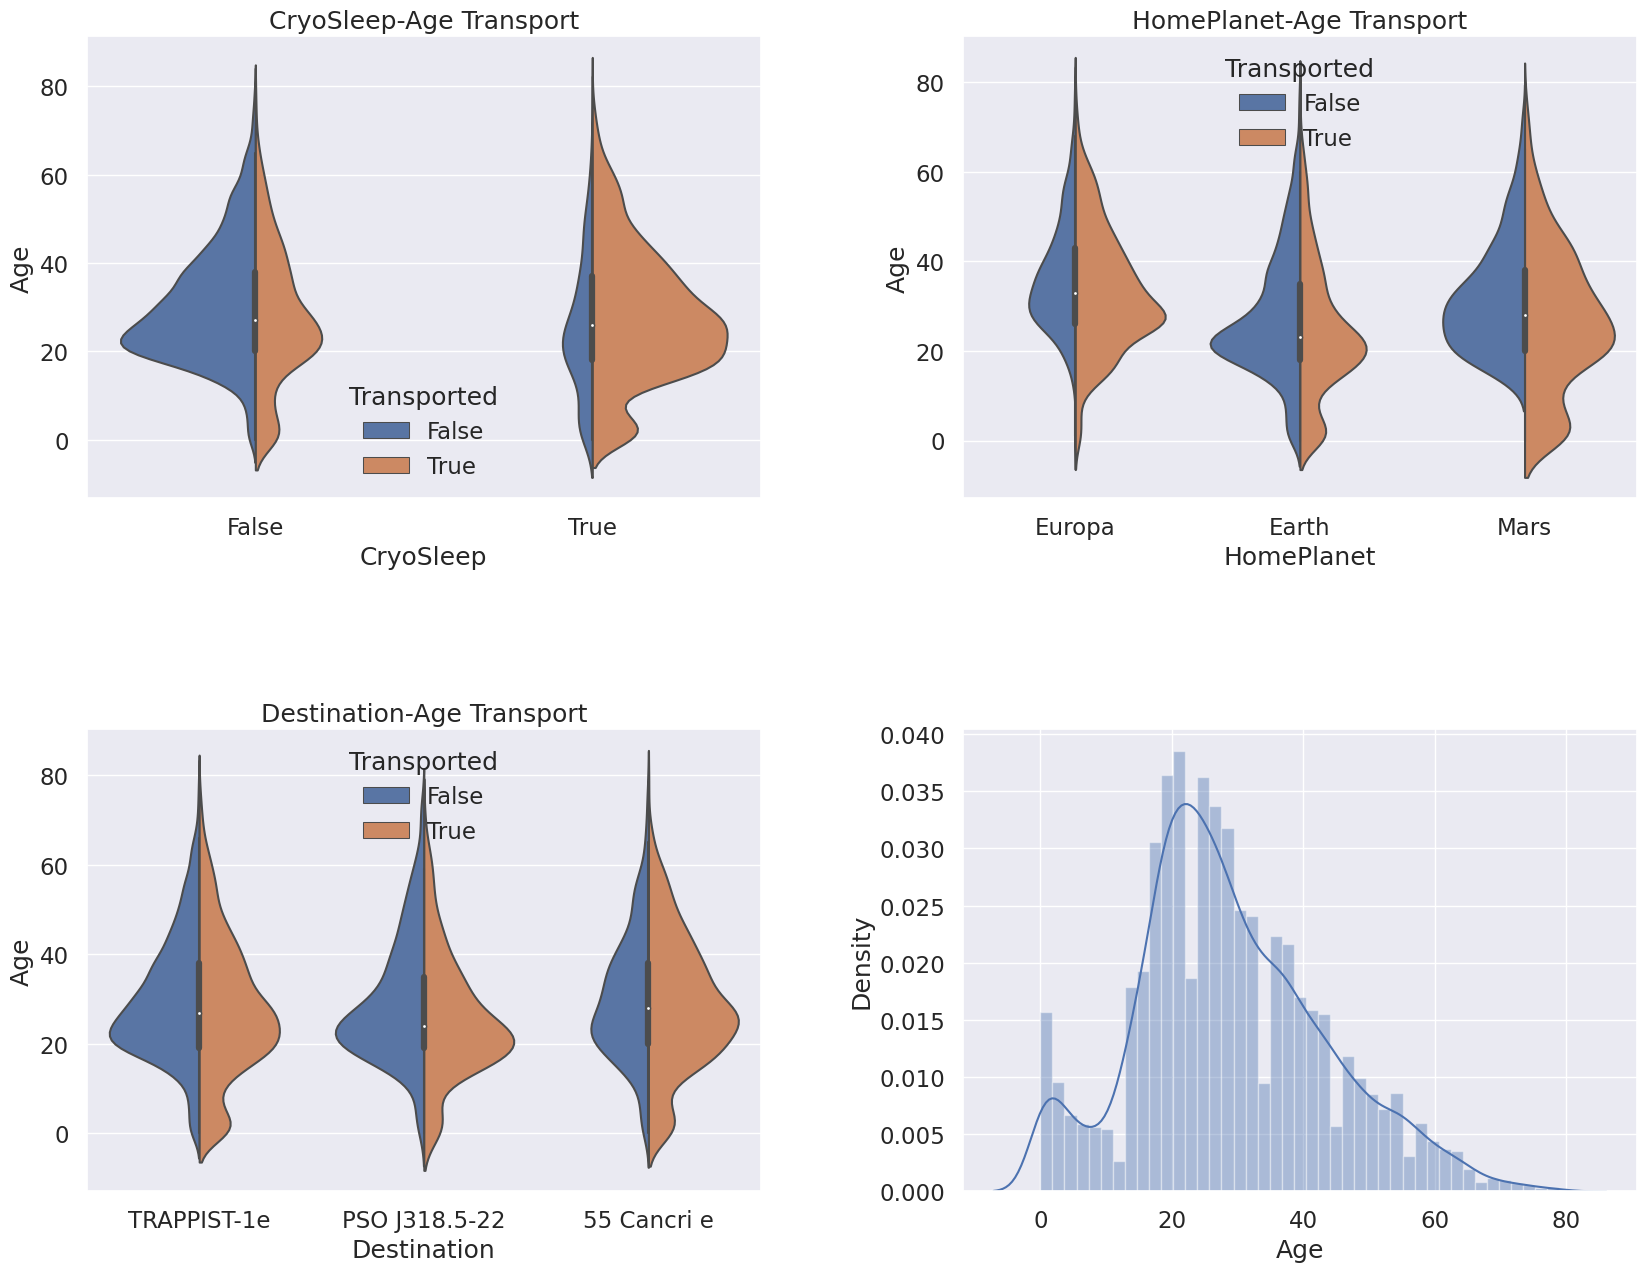

In [26]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.violinplot(data=df_train, x='CryoSleep', y='Age', hue='Transported', split=True, scale='count', ax=ax[0, 0])
ax[0, 0].set_title("CryoSleep-Age Transport")

sns.violinplot(data=df_train, x='HomePlanet', y='Age', hue='Transported', split=True, scale='count', ax=ax[0, 1])
ax[0, 1].set_title("HomePlanet-Age Transport")

sns.violinplot(data=df_train, x='Destination', y='Age', hue='Transported', split=True, scale='count', ax=ax[1, 0])
ax[1, 0].set_title("Destination-Age Transport")

sns.distplot(df_train['Age'], kde=True, ax=ax[1, 1])

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### ***7. VIP***

<Axes: xlabel='VIP', ylabel='count'>

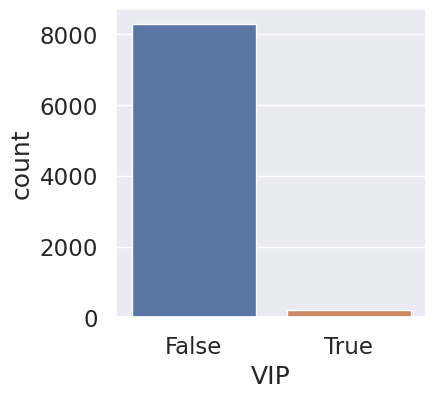

In [27]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df_train, x='VIP')

In [28]:
pd.crosstab(df_train['VIP'], df_train['Transported'], margins=True).style.background_gradient(cmap='summer_r')

Transported,False,True,All
VIP,,,
False,4093,4198,8291
True,123,76,199
All,4216,4274,8490


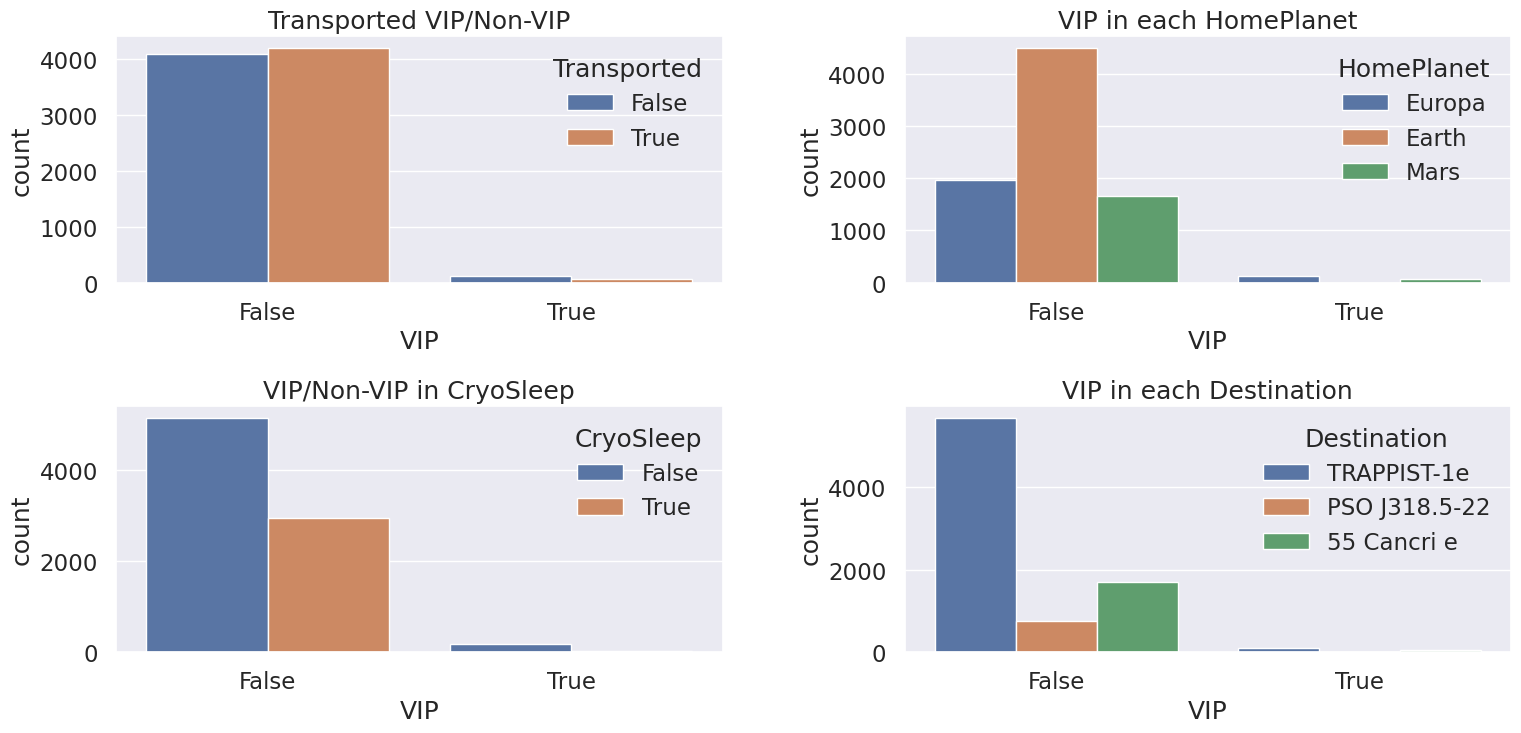

In [29]:
f, ax = plt.subplots(2, 2, figsize=(18, 8))

sns.countplot(data=df_train, x='VIP', hue='Transported', ax=ax[0, 0])
ax[0, 0].set_title("Transported VIP/Non-VIP")

sns.countplot(data=df_train, x='VIP', hue='HomePlanet', ax=ax[0, 1])
ax[0, 1].set_title("VIP in each HomePlanet")

sns.countplot(data=df_train, x='VIP', hue='CryoSleep', ax=ax[1, 0])
ax[1, 0].set_title("VIP/Non-VIP in CryoSleep")

sns.countplot(data=df_train, x='VIP', hue='Destination', ax=ax[1, 1])
ax[1, 1].set_title("VIP in each Destination")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### ***8. Amenities (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)***

In [30]:
df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [31]:
df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


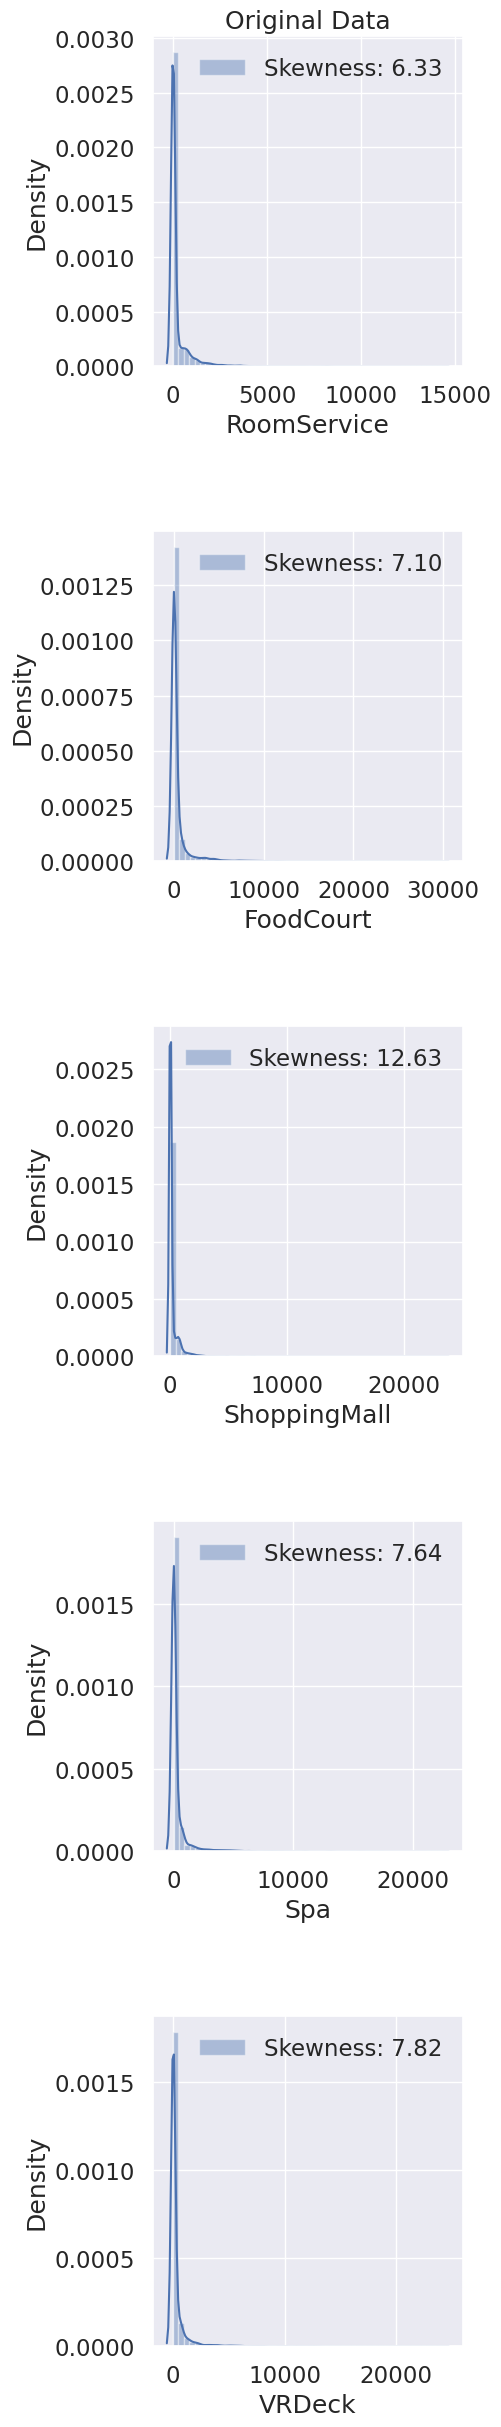

In [32]:
# np.log() Application Result
f, ax = plt.subplots(5, 1, figsize=(4, 30))

sns.distplot(df_train['RoomService'], color='b', kde=True, label="Skewness: {:.2f}".format(df_train['RoomService'].skew()), ax=ax[0])
ax[0].legend(loc='best')
ax[0].set_title("Original Data")

sns.distplot(df_train['FoodCourt'], color='b', kde=True, label="Skewness: {:.2f}".format(df_train['FoodCourt'].skew()), ax=ax[1])
ax[1].legend(loc='best')

sns.distplot(df_train['ShoppingMall'], color='b', kde=True, label="Skewness: {:.2f}".format(df_train['ShoppingMall'].skew()), ax=ax[2])
ax[2].legend(loc='best')

sns.distplot(df_train['Spa'], color='b', kde=True, label="Skewness: {:.2f}".format(df_train['Spa'].skew()), ax=ax[3])
ax[3].legend(loc='best')

sns.distplot(df_train['VRDeck'], color='b', kde=True, label="Skewness: {:.2f}".format(df_train['VRDeck'].skew()), ax=ax[4])
ax[4].legend(loc='best')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### ***9. Name***

In [33]:
df_train['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

# ***3. Feature Engineering***

### ***Seperate Data & Additional Analysis***

##### ***1. PassengerId***

In [34]:
# PassengerId
df_train['PassengerId_g'] = df_train.PassengerId.str.extract(r'(\d{4})')
df_train['PassengerId_p'] = df_train.PassengerId.str.extract(r'_(\d{2})')

df_test['PassengerId_g'] = df_test.PassengerId.str.extract(r'(\d{4})')
df_test['PassengerId_p'] = df_test.PassengerId.str.extract(r'_(\d{2})')

print(df_train[['PassengerId_g', 'PassengerId_p']].head())

  PassengerId_g PassengerId_p
0          0001            01
1          0002            01
2          0003            01
3          0003            02
4          0004            01


##### ***2. Cabin***

In [35]:
# Cabin
df_train['Cabin_deck'] = df_train.Cabin.str.extract(r'^([A-Z]+)\/')
df_train['Cabin_num'] = df_train.Cabin.str.extract(r'\/(\d+)\/')
df_train['Cabin_side'] = df_train.Cabin.str.extract(r'\/([A-Z]+)$')

df_test['Cabin_deck'] = df_test.Cabin.str.extract(r'^([A-Z]+)\/')
df_test['Cabin_num'] = df_test.Cabin.str.extract(r'\/(\d+)\/')
df_test['Cabin_side'] = df_test.Cabin.str.extract(r'\/([A-Z]+)$')

df_train[['Cabin_deck', 'Cabin_num', 'Cabin_side']].head()

,Cabin_deck,Cabin_num,Cabin_side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


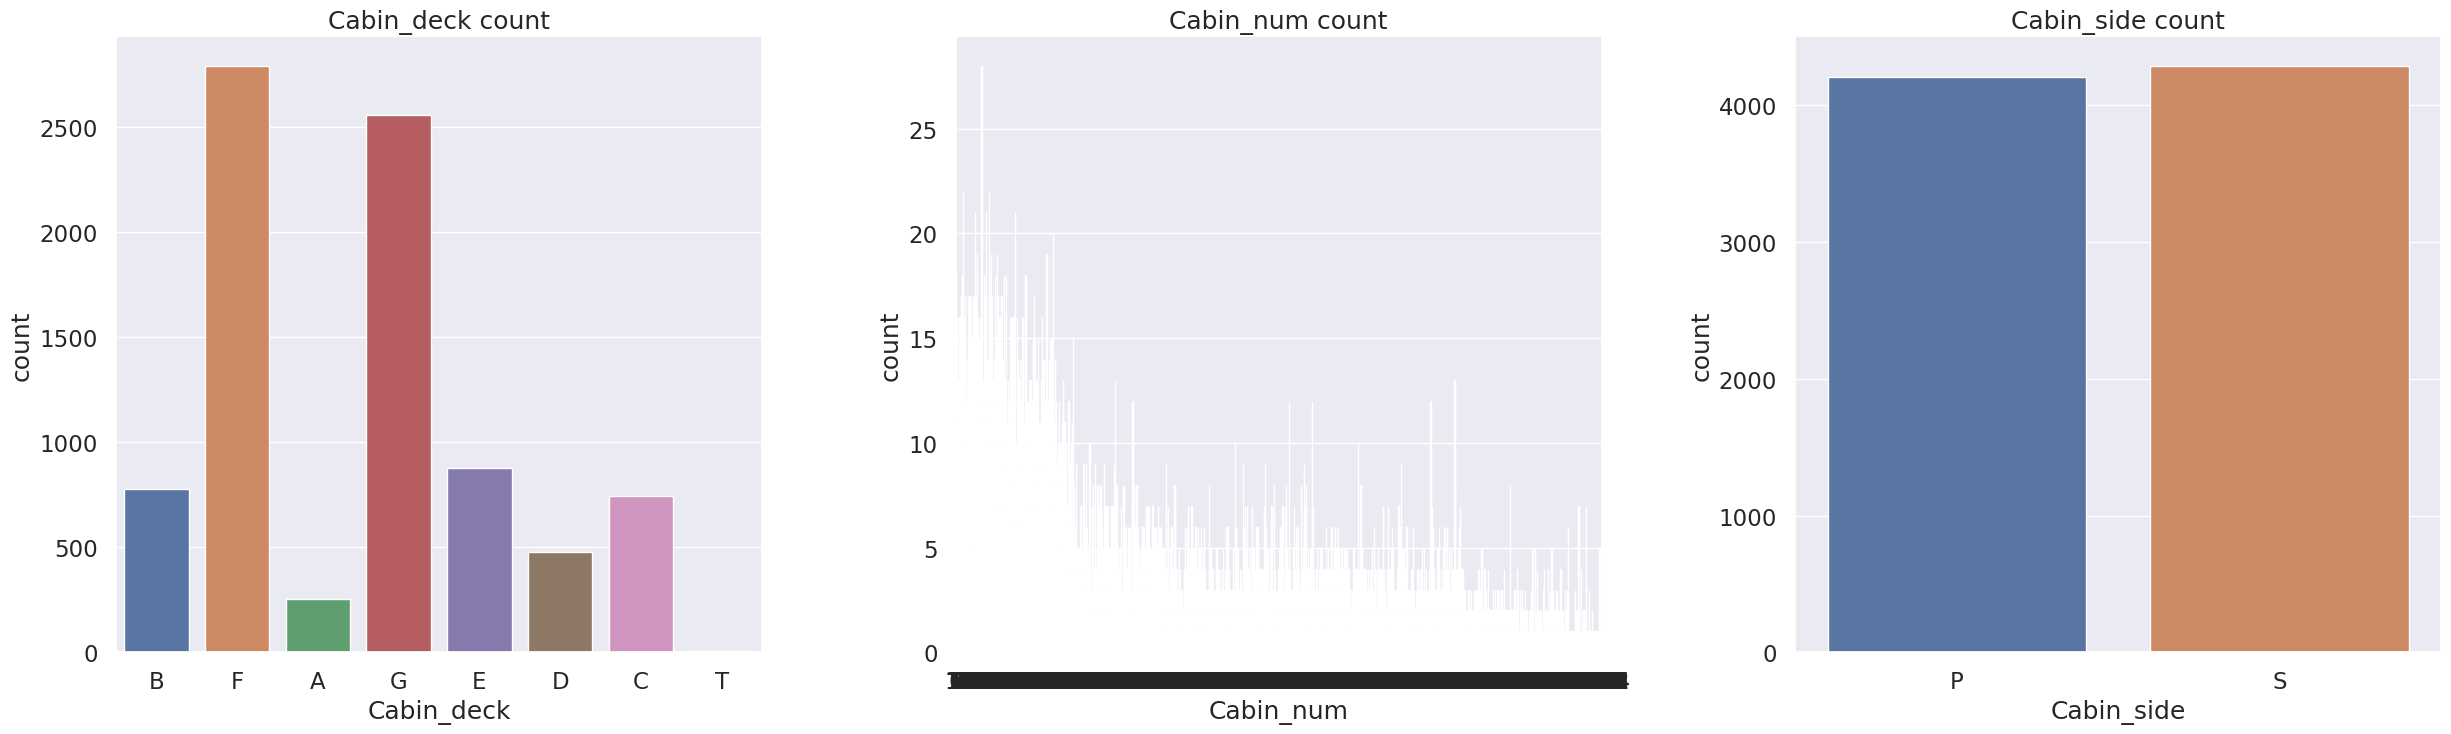

In [36]:
f, ax = plt.subplots(1, 3, figsize=(30, 8))

sns.countplot(data=df_train, x='Cabin_deck', ax=ax[0])
ax[0].set_title("Cabin_deck count")

sns.countplot(data=df_train, x='Cabin_num', ax=ax[1])
ax[1].set_title("Cabin_num count")

sns.countplot(data=df_train, x='Cabin_side', ax=ax[2])
ax[2].set_title("Cabin_side count")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

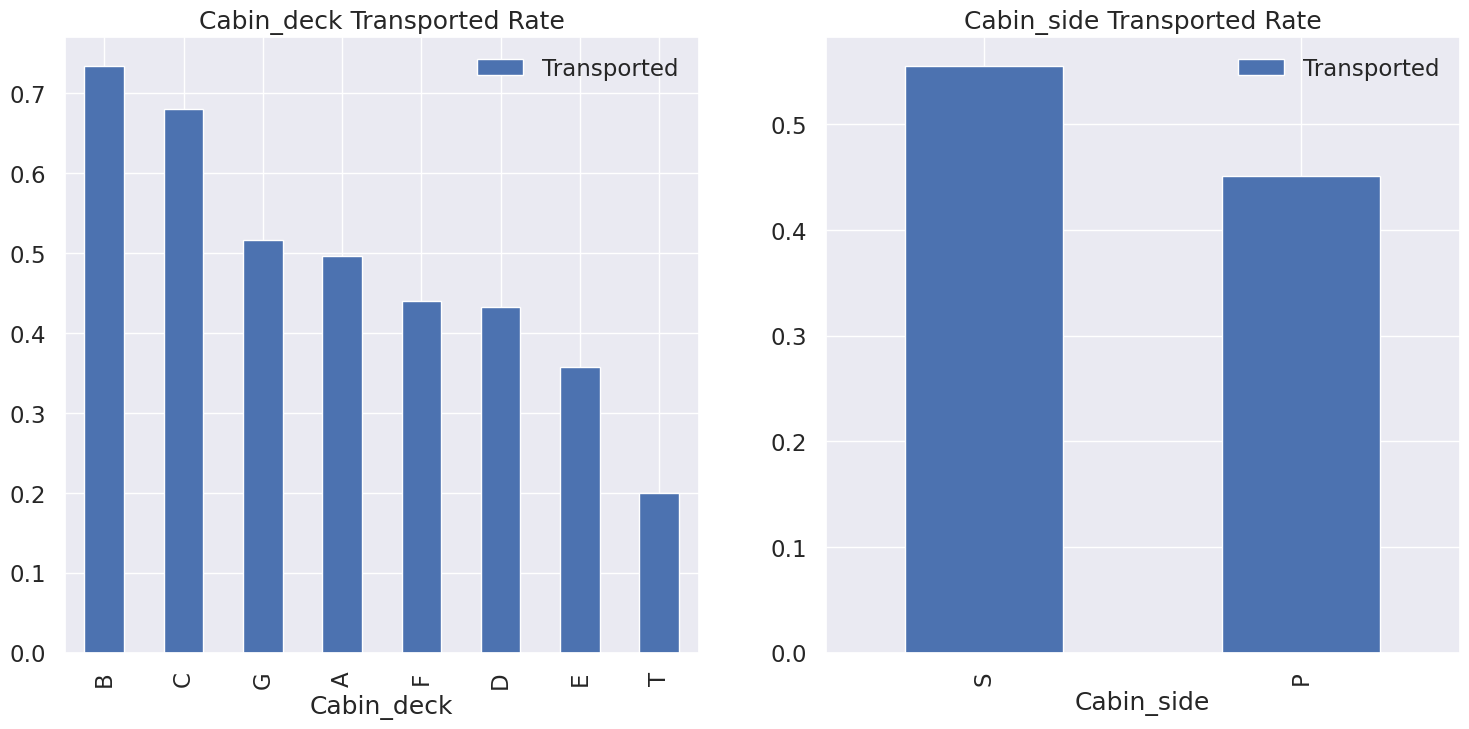

In [37]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Cabin_deck', 'Transported']].groupby('Cabin_deck', as_index=True).mean().sort_values(by='Transported', ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("Cabin_deck Transported Rate")

df_train[['Cabin_side', 'Transported']].groupby('Cabin_side', as_index=True).mean().sort_values(by='Transported', ascending=False).plot.bar(ax=ax[1])
ax[1].set_title("Cabin_side Transported Rate")

plt.show()

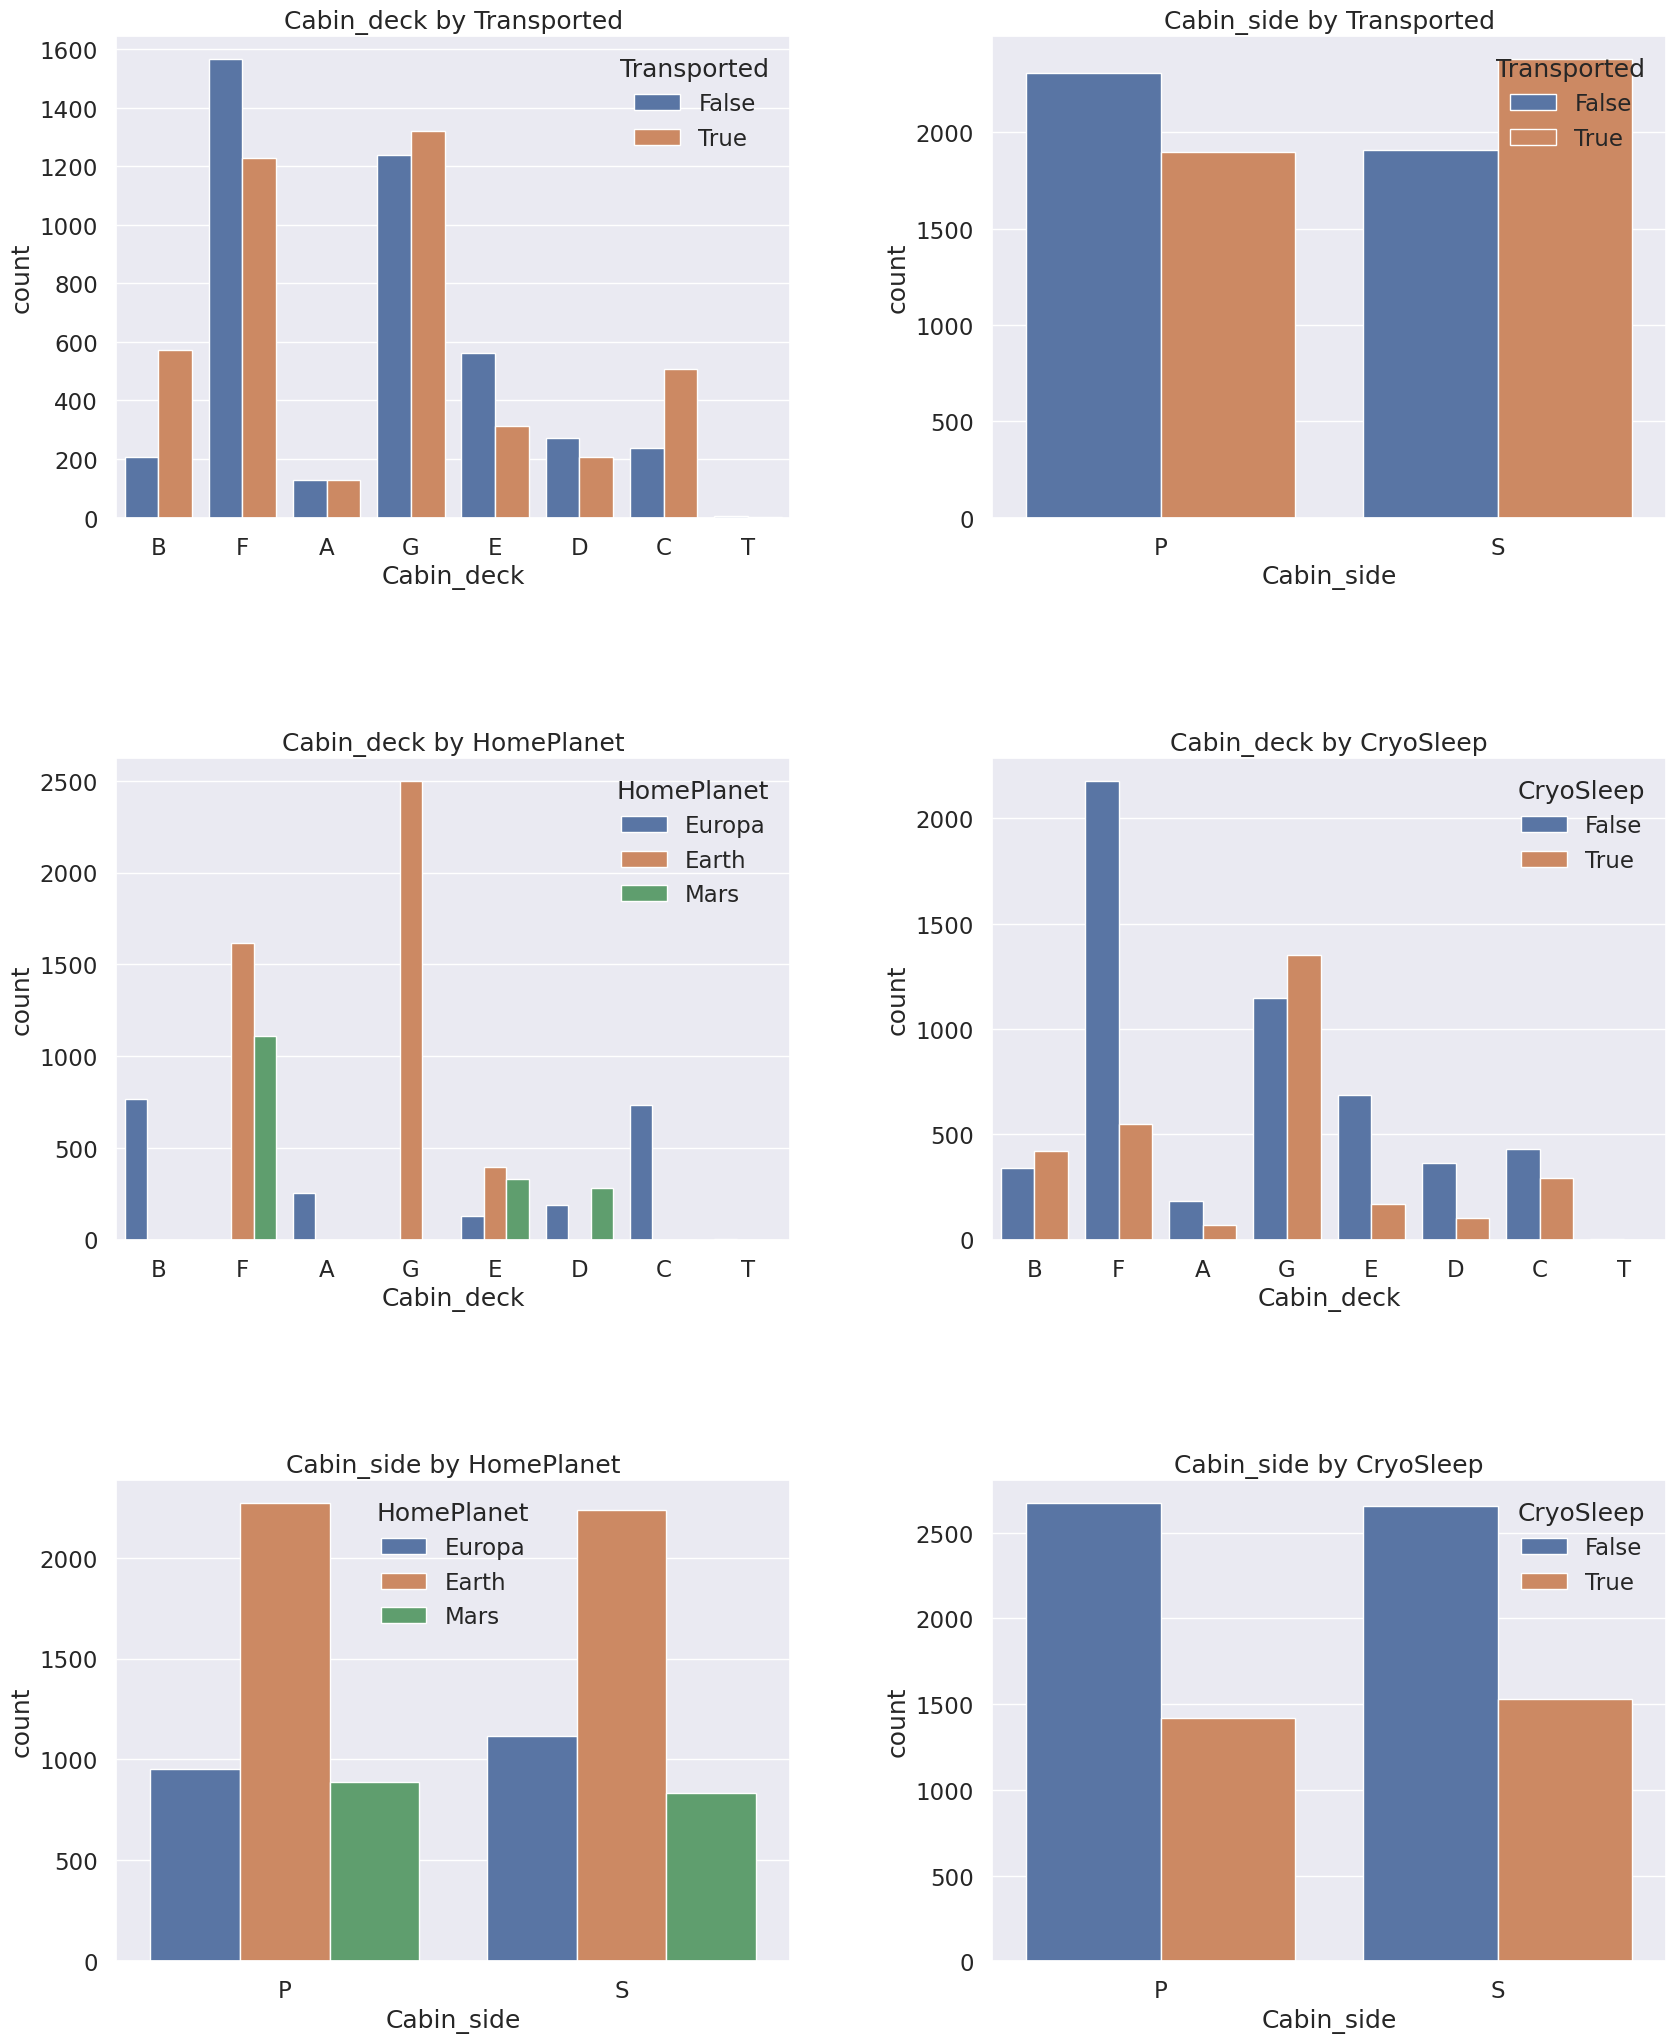

In [38]:
f, ax = plt.subplots(3, 2, figsize=(20, 25))

sns.countplot(data=df_train, x='Cabin_deck', hue='Transported', ax=ax[0, 0])
ax[0, 0].set_title("Cabin_deck by Transported")

sns.countplot(data=df_train, x='Cabin_side', hue='Transported', ax=ax[0, 1])
ax[0, 1].set_title("Cabin_side by Transported")

sns.countplot(data=df_train, x='Cabin_deck', hue='HomePlanet', ax=ax[1, 0])
ax[1, 0].set_title("Cabin_deck by HomePlanet")

sns.countplot(data=df_train, x='Cabin_deck', hue='CryoSleep', ax=ax[1, 1])
ax[1, 1].set_title("Cabin_deck by CryoSleep")

sns.countplot(data=df_train, x='Cabin_side', hue='HomePlanet', ax=ax[2, 0])
ax[2, 0].set_title("Cabin_side by HomePlanet")

sns.countplot(data=df_train, x='Cabin_side', hue='CryoSleep', ax=ax[2, 1])
ax[2, 1].set_title("Cabin_side by CryoSleep")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

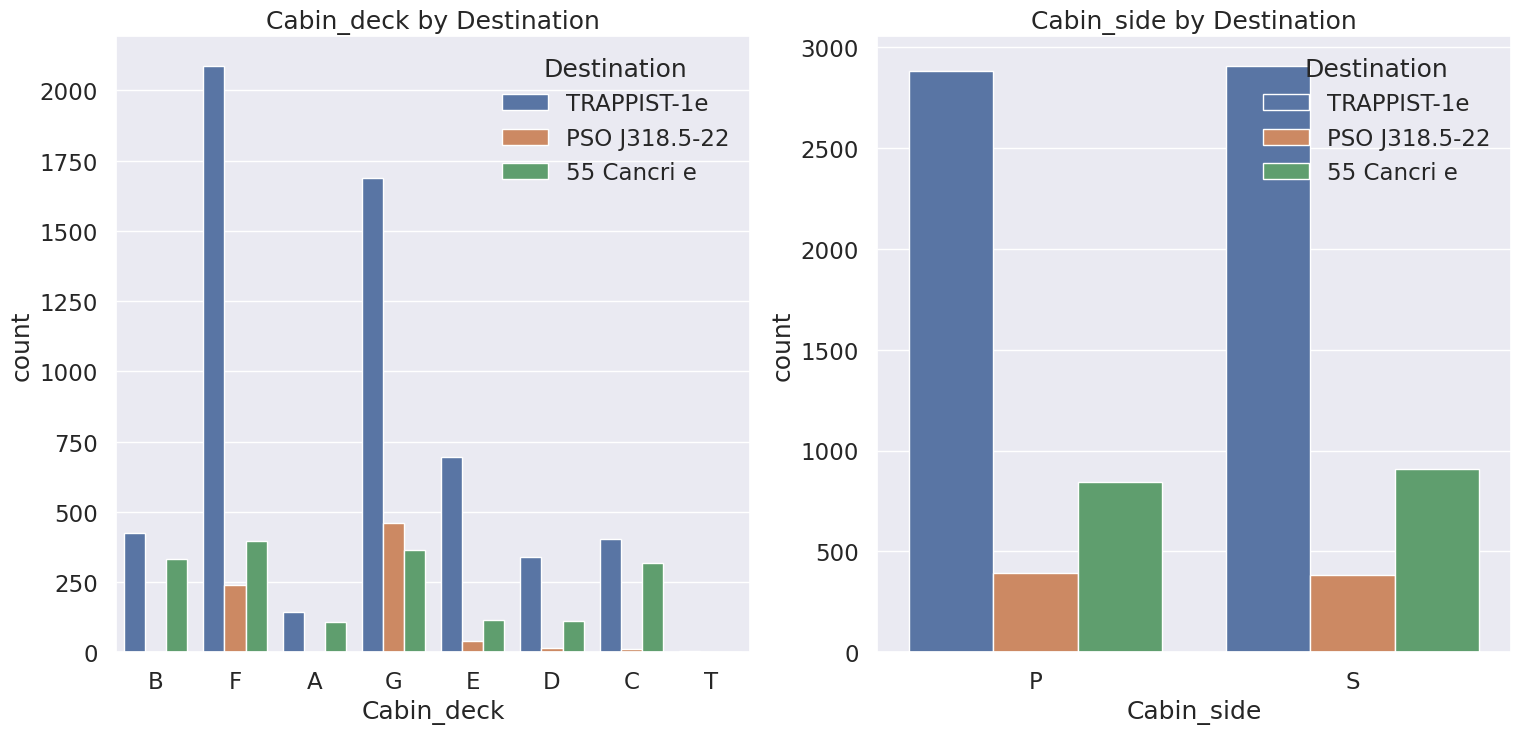

In [39]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=df_train, x='Cabin_deck', hue='Destination', ax=ax[0])
ax[0].set_title("Cabin_deck by Destination")

sns.countplot(data=df_train, x='Cabin_side', hue='Destination', ax=ax[1])
ax[1].set_title("Cabin_side by Destination")

plt.show()

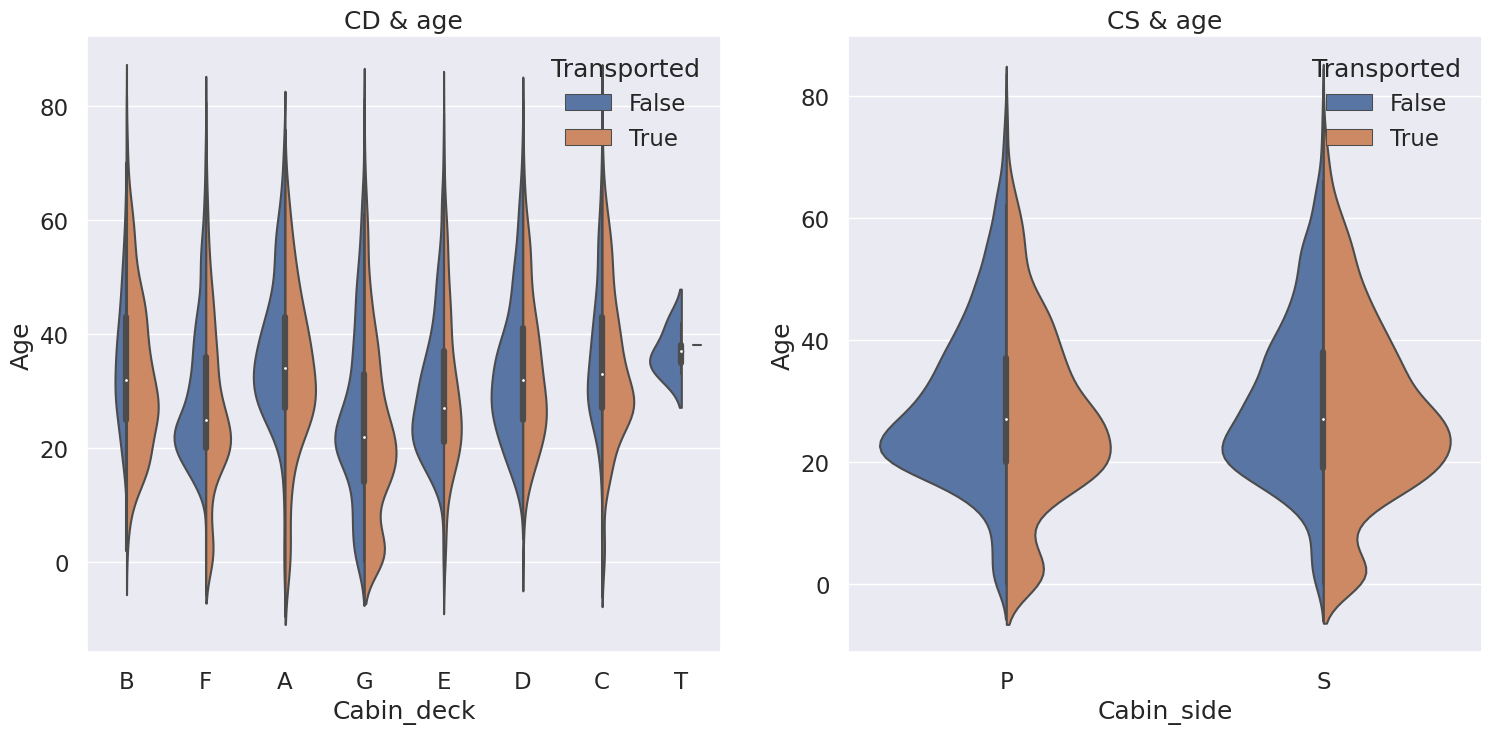

In [40]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(data=df_train, x='Cabin_deck', y='Age', hue='Transported',  scale='count',split=True, ax=ax[0])
ax[0].set_title("CD & age")

sns.violinplot(data=df_train, x='Cabin_side', y='Age', hue='Transported',  scale='count',split=True, ax=ax[1])
ax[1].set_title("CS & age")

plt.show()

In [41]:
df_train.Cabin_deck.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [42]:
df_train[df_train['Transported']].Cabin_deck.value_counts()

G    1321
F    1229
B     572
C     508
E     313
D     207
A     127
T       1
Name: Cabin_deck, dtype: int64

In [43]:
df_train[['HomePlanet', 'Cabin_deck']].groupby('HomePlanet', as_index=True).value_counts()

HomePlanet  Cabin_deck
Earth       G             2498
            F             1614
            E              395
Europa      B              766
            C              734
            A              252
            D              186
            E              128
            T                4
Mars        F             1110
            E              330
            D              282
dtype: int64

In [44]:
df_train[['Destination', 'Cabin_deck']].groupby('Destination', as_index=True).value_counts()

Destination    Cabin_deck
55 Cancri e    F              398
               G              365
               B              333
               C              317
               E              116
               D              113
               A              108
PSO J318.5-22  G              461
               F              241
               E               41
               D               17
               C               13
               B                3
               A                2
TRAPPIST-1e    F             2088
               G             1688
               E              696
               B              426
               C              405
               D              338
               A              142
               T                5
dtype: int64

<Axes: xlabel='Cabin_deck', ylabel='count'>

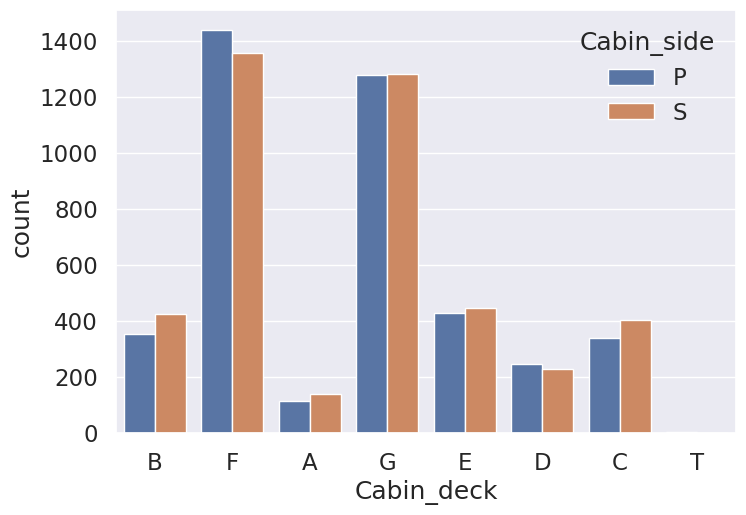

In [45]:
sns.countplot(data=df_train, x='Cabin_deck', hue='Cabin_side')

* CD == T -> homeplanet: Europa // destination: TRAPPIST-1e
* CD == G -> homeplanet: Earth // destination: 
* CD == C -> homeplanet: Europa // destination: not PSO J318.5-22
* CD == B -> homeplanet: Europa // destination: not PSO J318.5-22
* CD == A -> homeplanet: Europa // destination: not PSO J318.5-22
* CD == D -> homeplanet: not Earth // destination: TRAPPIST-1e
* CD == E -> homeplanet:  // destination: TRAPPIST-1e
* CD == F -> homeplanet: not Europa // destination: TRAPPIST-1e


Text(0.5, 1.0, 'CS & vip')

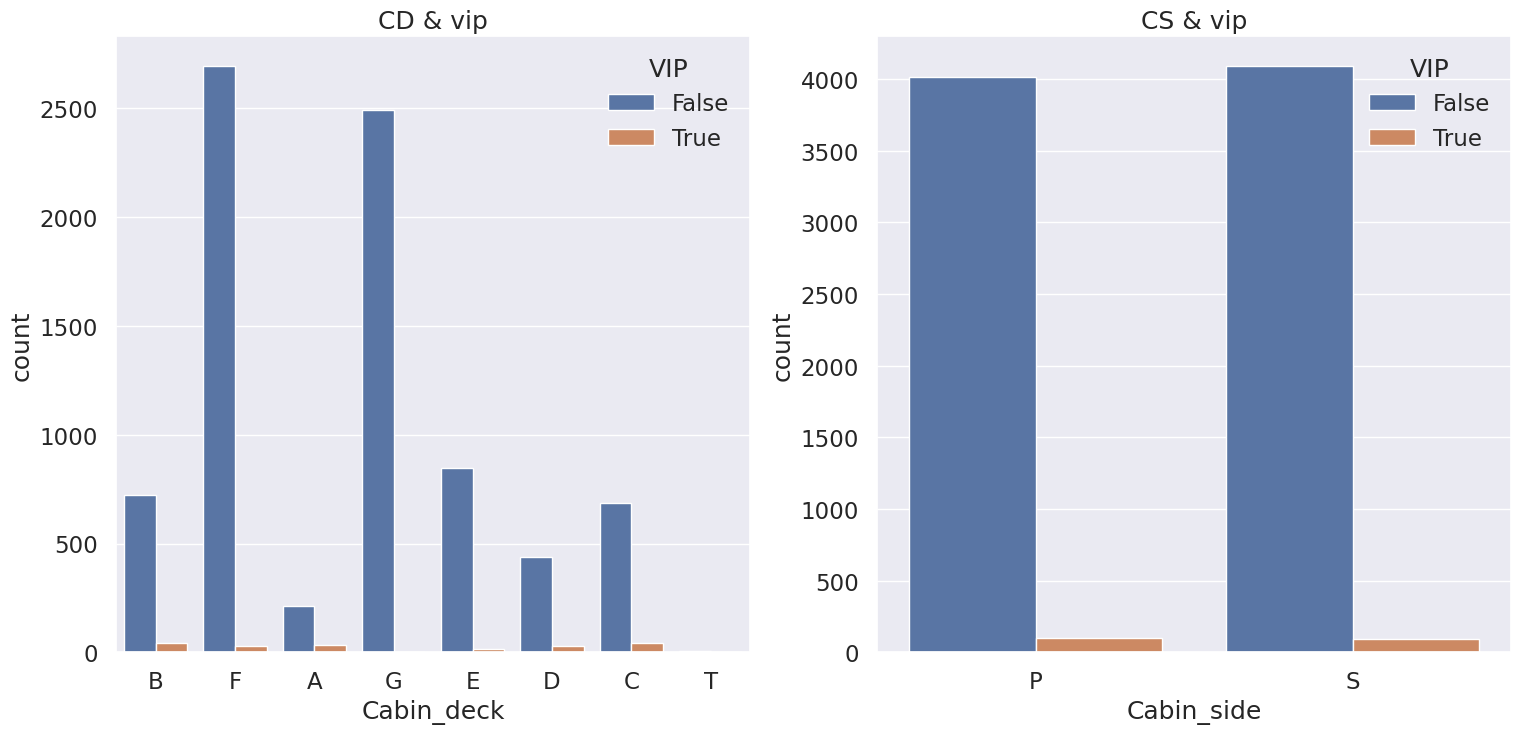

In [46]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=df_train, x='Cabin_deck', hue='VIP', ax=ax[0])
ax[0].set_title("CD & vip")

sns.countplot(data=df_train, x='Cabin_side', hue='VIP', ax=ax[1])
ax[1].set_title("CS & vip")

##### ***3. Name***

In [47]:
df_train[['fname', 'lname']] = df_train['Name'].str.split(' ', expand=True)
df_test[['fname', 'lname']] = df_test['Name'].str.split(' ', expand=True)

In [48]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,PassengerId_g,PassengerId_p,Cabin_deck,Cabin_num,Cabin_side,fname,lname
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0001,01,B,0,P,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,0002,01,F,0,S,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0003,01,A,0,S,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0003,02,A,0,S,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,0004,01,F,1,S,Willy,Santantines


### ***Fill NAN Data***

In [49]:
# VIP
# fill in all NAN - false
df_train['VIP'].fillna(False, inplace=True)
df_test['VIP'].fillna(False, inplace=True)

In [50]:
# 'Amenities': make new column - sum of amenities
df_train['Amenities'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']
df_test['Amenities'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']

# if cyrosleep true -> 0
# else -> fill in it with mean: using SimpleImputer in sklearn
df_train.loc[(df_train.Amenities.isnull()) & (df_train.CryoSleep == True), 'Amenities'] = 0
df_test.loc[(df_test.Amenities.isnull()) & (df_test.CryoSleep == True), 'Amenities'] = 0

# Age
# Fill it using SimpleImputer in sklearn
numerics = ['Amenities', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imp = SimpleImputer(strategy = 'mean')

df_train[numerics] = imp.fit_transform(df_train[numerics])
df_test[numerics] = imp.fit_transform(df_test[numerics])

In [51]:
# Cabin
# Fill it using SimpleImputer in sklearn
cabins = ['Cabin_deck', 'Cabin_num', 'Cabin_side']
imp = SimpleImputer(strategy = 'most_frequent')
df_train[cabins] = imp.fit_transform(df_train[cabins])
df_test[cabins] = imp.fit_transform(df_test[cabins])

In [52]:
# Name: fill as Unknown
# Too hard to judge names using other columns 
df_train['fname'].fillna("Unknown", inplace=True)
df_train['lname'].fillna("Unknown", inplace=True)
df_test['fname'].fillna("Unknown", inplace=True)
df_test['lname'].fillna("Unknown", inplace=True)

In [53]:
# CryoSleep
# if sum(Amenities) > 0 -> true // else false
df_train.loc[(df_train.CryoSleep.isnull()) & (df_train.Amenities == 0), 'CryoSleep'] = True
df_train['CryoSleep'].fillna(False, inplace=True)

df_test.loc[(df_test.CryoSleep.isnull()) & (df_test.Amenities == 0), 'CryoSleep'] = True
df_test['CryoSleep'].fillna(False, inplace=True)

In [54]:
# HomePlanet
# Fill in NAN Based on Cabin first
df_train.loc[(df_train.HomePlanet.isnull()) & (df_train.Cabin_deck.isin(['T', 'C', 'B' , 'A'])), 'HomePlanet'] = 'Europa'
df_test.loc[(df_test.HomePlanet.isnull()) & (df_test.Cabin_deck.isin(['T', 'C', 'B' , 'A'])), 'HomePlanet'] = 'Europa'

# Fill in remained NAN: 'Earth' - many data has value 'Earth'
df_train['HomePlanet'].fillna('Earth', inplace=True)
df_test['HomePlanet'].fillna('Earth', inplace=True)

In [55]:
# Destination
# Fill in NAN as 'TRAPPIST-1e' - many data has value 'TRAPPIST-1e'
df_train['Destination'].fillna('TRAPPIST-1e', inplace=True)
df_test['Destination'].fillna('TRAPPIST-1e', inplace=True)

In [56]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Amenities
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1421.252213
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049,2708.171944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,758.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1421.252213
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [57]:
df_train.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            199
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
PassengerId_g      0
PassengerId_p      0
Cabin_deck         0
Cabin_num          0
Cabin_side         0
fname              0
lname              0
Amenities          0
dtype: int64

### ***Change Data***

In [58]:
# HomePlanet
df_train['HomePlanet'] = df_train['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2})
df_test['HomePlanet'] = df_test['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2})

In [59]:
# Destination
df_train['Destination'] = df_train['Destination'].map({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})
df_test['Destination'] = df_test['Destination'].map({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})

In [60]:
# Age
def cat_age(x):
    return x // 10

df_train['Age'] = df_train['Age'].apply(cat_age)
df_test['Age'] = df_test['Age'].apply(cat_age)

In [61]:
# Cabin
df_train['Cabin_deck'] = df_train['Cabin_deck'].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7})
df_train['Cabin_side'] = df_train['Cabin_side'].map({'P':0, 'S':1})

df_test['Cabin_deck'] = df_test['Cabin_deck'].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7})
df_test['Cabin_side'] = df_test['Cabin_side'].map({'P':0, 'S':1})

### ***Correlation Check***

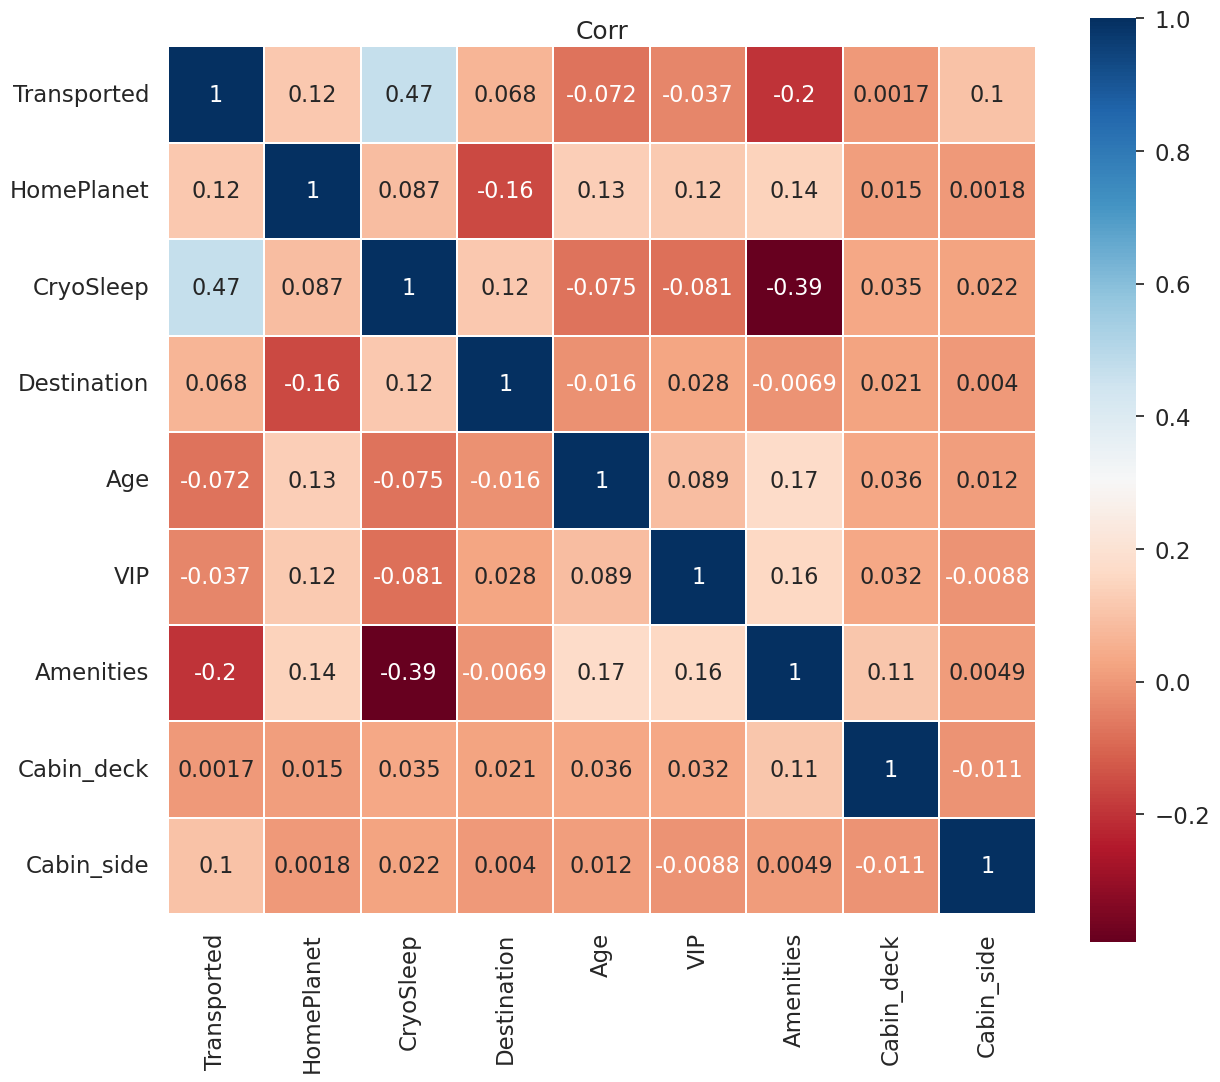

In [62]:
corr_data = df_train[['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Amenities', 'Cabin_deck', 'Cabin_side']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title("Corr")
sns.heatmap(corr_data.astype(float).corr(), cmap=colormap, linewidths=0.1, vmax=1.0, linecolor='white', square=True, annot=True, annot_kws={'size': 16})

del corr_data

### ***Data Preprocessing***

In [63]:
# HomePlanet
df_train = pd.get_dummies(df_train, columns=['HomePlanet'], prefix='hp')
df_test = pd.get_dummies(df_test, columns=['HomePlanet'], prefix='hp')

In [64]:
# Destination
df_train = pd.get_dummies(df_train, columns=['Destination'], prefix='dt')
df_test = pd.get_dummies(df_test, columns=['Destination'], prefix='dt')

In [65]:
# Cabin
df_train = pd.get_dummies(df_train, columns=['Cabin_deck'], prefix='cd')
df_test = pd.get_dummies(df_test, columns=['Cabin_deck'], prefix='cd')

df_train = pd.get_dummies(df_train, columns=['Cabin_side'], prefix='cs')
df_test = pd.get_dummies(df_test, columns=['Cabin_side'], prefix='cs')

In [66]:
df_train.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,cd_0,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cs_0,cs_1
0,0001_01,False,B/0/P,3.0,False,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,0002_01,False,F/0/S,2.0,False,109.0,9.0,25.0,549.0,44.0,...,0,1,0,0,0,0,0,0,0,1
2,0003_01,False,A/0/S,5.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,0,1,0,0,0,0,0,0,1
3,0003_02,False,A/0/S,3.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,0,1,0,0,0,0,0,0,1
4,0004_01,False,F/1/S,1.0,False,303.0,70.0,151.0,565.0,2.0,...,0,1,0,0,0,0,0,0,0,1


### ***Drop Data***

In [67]:
df_train.drop(['PassengerId', 'Cabin', 'Name', 'fname', 'lname'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Cabin', 'Name', 'fname', 'lname'], axis=1, inplace=True)

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      8693 non-null   bool   
 1   Age            8693 non-null   float64
 2   VIP            8693 non-null   bool   
 3   RoomService    8693 non-null   float64
 4   FoodCourt      8693 non-null   float64
 5   ShoppingMall   8693 non-null   float64
 6   Spa            8693 non-null   float64
 7   VRDeck         8693 non-null   float64
 8   Transported    8693 non-null   bool   
 9   PassengerId_g  8693 non-null   object 
 10  PassengerId_p  8693 non-null   object 
 11  Cabin_num      8693 non-null   object 
 12  Amenities      8693 non-null   float64
 13  hp_0           8693 non-null   uint8  
 14  hp_1           8693 non-null   uint8  
 15  hp_2           8693 non-null   uint8  
 16  dt_0           8693 non-null   uint8  
 17  dt_1           8693 non-null   uint8  
 18  dt_2    

# ***4. ML Model Prediction***

In [69]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [70]:
X_train = df_train.drop('Transported', axis=1).values
y_train = df_train['Transported'].values
X_test = df_test.values

In [71]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [72]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
preds = model.predict(X_val)

In [73]:
print("Total Num: %d // Accuracy: %.2f" % (y_val.shape[0], metrics.accuracy_score(preds, y_val) * 100))

Total Num: 2174 // Accuracy: 80.31


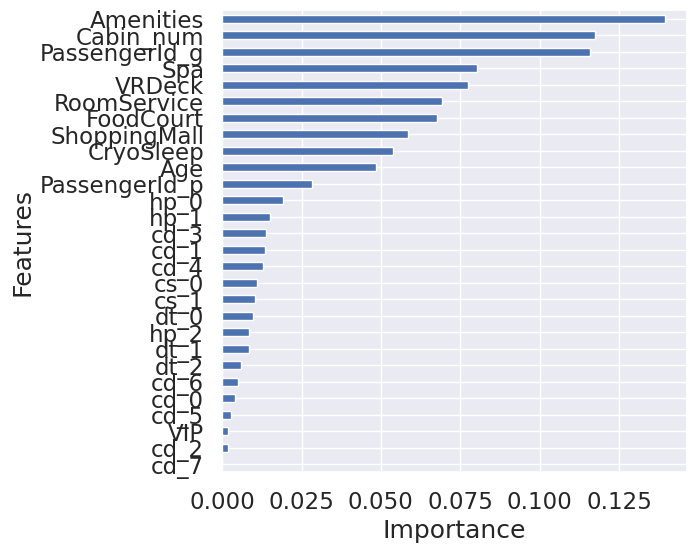

In [74]:
plt.figure(figsize=(6, 6))
pd.Series(model.feature_importances_, index=df_test.columns).sort_values(ascending=True).plot.barh()
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# ***5. Submit***

In [75]:
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [76]:
final_result = model.predict(X_test)
submission['Transported'] = final_result

In [77]:
submission.to_csv("/kaggle/working/submission.csv", index=False)